# Aim:
          To analyse the Quora question pair dataset.
          
 # Columns:
              The columns provided in the dataset are "id", "qid1", "qid2", "question1","question2"
              
              # id
      It provides us a unique number given to the question pair.

# qid
      It is question id which is uniquely provided to each and every question.(Not a column)

# qid1
      It is the qid provided to the first question of the question pair.

# qid2
      It is the qid provided to the second question of the question pair.

# question1
      Full text question of the question pair.

# question2
      Another full text question of the question pair.
# is_duplicate
      Answers wether the question 2 is duplicate of question 1.

There are 404352 question pairs available in the dataset.

# Importing packages.

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Linking and extracting the 'csv' file.

In [2]:
questions=pd.read_csv("Desktop/questions.csv")

In [3]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
id              404351 non-null int64
qid1            404351 non-null int64
qid2            404351 non-null int64
question1       404350 non-null object
question2       404349 non-null object
is_duplicate    404351 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


# Observation
Knowing the number of values in each column of our dataset.

# Graphing number of duplicates and non dublicate question pairs.

0    255045
1    149306
Name: is_duplicate, dtype: int64


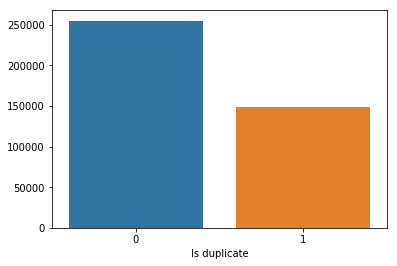

In [5]:
duplicate=questions['is_duplicate'].value_counts()
print(duplicate)
sns.barplot(duplicate.index,duplicate.values)
plt.xlabel('Is duplicate')
plt.show()

# Observation:
We observe that the number of duplicate questions are almost half of the actual questions.

# Analysing the data.

In [14]:
print("Number of questions available={}".format(len(questions)))

Number of questions available=404351


In [20]:
print("Percentage of not similar question pairs={} ".format(100-round(questions["is_duplicate"].mean()*100,2)))#mean adds up the number of '1' which is the duplicate question pairs.
print("Percentage of similar question pairs={}".format(round(questions['is_duplicate'].mean()*100,2)))

Percentage of not similar question pairs=63.08 
Percentage of similar question pairs=36.92


# Observing the repeatation of questions.

In [36]:
#Arranging the question id's in series. After converting it into list.
qid1=pd.Series(questions['qid1'].tolist() + questions['qid2'].tolist())
unique=np.unique(qid1)
print("Number of unique questiosn available={}".format(len(unique)))
repeated=np.sum((qid1.value_counts())>1)# If a number is repeated  more than a time, it gets added.
print("Number of questions which are repeated atleast one={}".format(repeated))
print("Whose percentage is {}".format((13698*100)/(789801+13698)))
qidvalues=qid1.value_counts()#Counting the values
qidvalues=qidvalues.to_numpy()# converting it into a numpy array

Number of unique questiosn available=789801
Number of questions which are repeated atleast one=13698
Whose percentage is 1.7047936587351074


# Observation:
Percentage of unique questions, number of available and repeated questions and conversion of number of values in numpy array

# Using the values to plot a bar plot

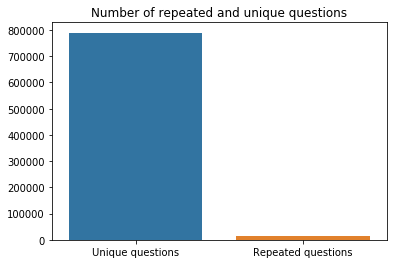

In [54]:
label=["Unique questions","Repeated questions"]
pl=[len(unique),repeated]
sns.barplot(label,pl)
plt.title("Number of repeated and unique questions")
plt.show()

# Checking wether a row is repeated or wether a question pair is repeated.

In [65]:
duppair=questions[["qid1","qid2","is_duplicate"]].groupby(['qid1','qid2',]).count().reset_index()# The repeated rows are removed and arranged.
x=(questions.shape[0]-duppair.shape[0])# converting number of rows into a single number and then calculating.
print("Number of repeated rows={}".format(x))

Number of repeated rows=3


# Observation:
So the number rows that are being repeated are 3.So we need can remove these rows.

# Plotting a graph to understand, how many times a question has repeated.

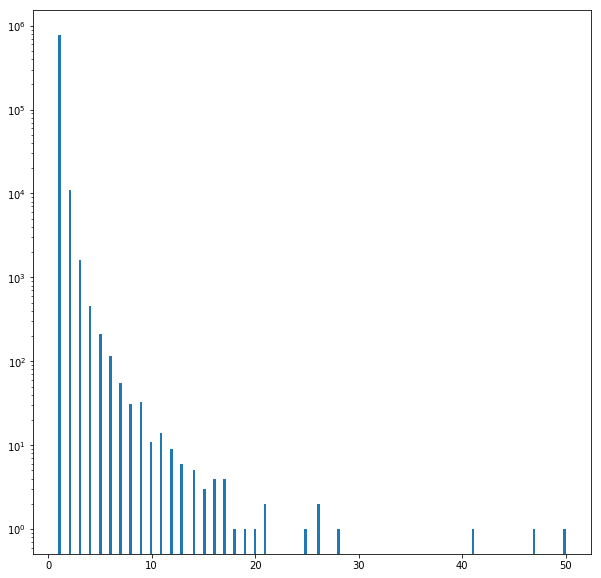

In [90]:
plt.figure(figsize=(10,10))
plt.hist(qid1.value_counts(),bins=200)# Hard to differentiate between the lines. So modifying the y scale.
plt.yscale('log',nonposy="clip")# Converting the values to log.So that the bar is visualable.
plt.show()

# Observation:
Few questions are repeated many times than others.

# Finding the most repeated question.

In [97]:
from collections import Counter

In [108]:
occ=Counter(qid1)
most=occ.most_common(1)[0][0]

In [107]:
most

65333

In [112]:
questions.loc[questions['qid1'] == 65333]

,id,qid1,qid2,question1,question2,is_duplicate
81000,81000,65333,160900,What are the best ways to reduce and eliminate...,How can I stay fit without going to a gym?,0
174180,174180,65333,344125,What are the best ways to reduce and eliminate...,How can I lose weight quickly?,0
231901,231901,65333,456930,What are the best ways to reduce and eliminate...,What is the best exercise for belly fat?,1


# Observation:
The most frequently asked question was about "How to reduce belly fat"!